##  Installing all the libraries

In [58]:
%load_ext dotenv
%dotenv
!pip3 install prometheus-api-client==0.0.2b1
!pip3 install matplotlib

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [59]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

## Setting up the connection to scrape metrics from the prometheus instance
We need to obtain a session token in order to scrape the required Thanos instance on OpenShift. You can obtain this token value (after having logged in to OpenShift) and setting it as an env variable. You need to set the URL as the URL of the prometheus instance you wish to collect your metrics from and you can read this from an another env variable.

In [60]:
url = os.environ.get("FLT_PROM_URL")
token = os.environ.get("FLT_PROM_ACCESS_TOKEN")

## Collecting the metrics 
Lets create a `PrometheusConnect`object which stores the connection parameters

In [61]:
pc = PrometheusConnect(url=url, headers={"Authorization": "bearer {}".format(token)}, disable_ssl=True)

Fetching a list of all metrics being scraped by the prometheus instance

In [62]:
all_metrics = pc.all_metrics()
all_metrics

/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


['alerts',
 'cluster:capacity_cpu_cores:sum',
 'cluster:capacity_memory_bytes:sum',
 'cluster:cpu_usage_cores:sum',
 'cluster:memory_usage_bytes:sum',
 'cluster:node_instance_type_count:sum',
 'cluster_operator_conditions',
 'cluster_operator_up',
 'cluster_version',
 'cluster_version_available_updates',
 'cluster_version_payload',
 'code:apiserver_request_count:rate:sum',
 'etcd_object_counts',
 'instance:etcd_object_counts:sum',
 'kube_pod_status_ready:etcd:sum',
 'kube_pod_status_ready:image_registry:sum',
 'openshift:cpu_usage_cores:sum',
 'openshift:memory_usage_bytes:sum',
 'scrape_duration_seconds',
 'scrape_samples_post_metric_relabeling',
 'scrape_samples_scraped',
 'scrape_series_added',
 'up']

In [63]:
print("Number of metrics present:", len(all_metrics))

Number of metrics present: 23


### Different methods to fetch the metric values

We can fetch the current metric value of a specifc metric name and label configurations

In [87]:
current_metric = pc.get_current_metric_value(metric_name='cluster:capacity_cpu_cores:sum')

/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


[{'metric': {'__name__': 'cluster:capacity_cpu_cores:sum',
   '_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e',
   'endpoint': 'internal',
   'job': 'telemeter-server',
   'label_beta_kubernetes_io_instance_type': 'm5.xlarge',
   'label_node_role_kubernetes_io': 'master',
   'monitor': 'prometheus',
   'namespace': 'telemeter-production',
   'pod': 'telemeter-server-4',
   'prometheus': 'openshift-monitoring/k8s',
   'prometheus_replica': 'prometheus-telemeter-0',
   'replica': '$(HOSTNAME)',
   'service': 'telemeter-server'},
  'value': [1563373133.572, '12']},
 {'metric': {'__name__': 'cluster:capacity_cpu_cores:sum',
   '_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e',
   'endpoint': 'internal',
   'job': 'telemeter-server',
   'label_beta_kubernetes_io_instance_type': 'm5.xlarge',
   'monitor': 'prometheus',
   'namespace': 'telemeter-production',
   'pod': 'telemeter-server-4',
   'prometheus': 'openshift-monitoring/k8s',
   'prometheus_replica': 'prometheus-telemeter-0',
   'replica': 

In [88]:
len(current_metric)

1775

We can also fetch the data for a specific metric name based on a particular time frame, duration size and label configurations

In [64]:
metric_data = pc.get_metric_range_data(metric_name='cluster:capacity_cpu_cores:sum', start_time='15m', chunk_size='5m')

/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certifi

In [65]:
len(metric_data)

5232

Let's look at one of the metrics

In [66]:
print(metric_data[0])
print(type(metric_data[0]))

{'metric': {'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}, 'values': [[1563370543.599, '12'], [1563370603.599, '12'], [1563370663.599, '12'], [1563370723.599, '12'], [1563370783.599, '12']]}
<class 'dict'>


In [67]:
metric_data[0].keys()

dict_keys(['metric', 'values'])

In [68]:
for metric in range(5):
    print(metric_data[metric]["metric"], '\n')

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', '_id': '005f9e13-90c6-40a9-94f

To keep track of multiple metrics each with multiple chunks distributed in a list, we created the Metric and MetricsList classes


### How `MetricsList` works
To combine the chunks for each metric, we can initialize a `MetricsList` object <br>
It creates a list of `Metric` objects, where each object is unique for a specific time-series.

In [69]:
metrics_object_list = MetricsList(metric_data)
print(len(metrics_object_list))
print(type(metrics_object_list[0]))

1781
<class 'prometheus_api_client.metric.Metric'>


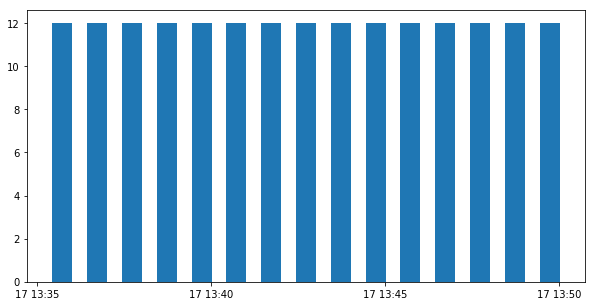

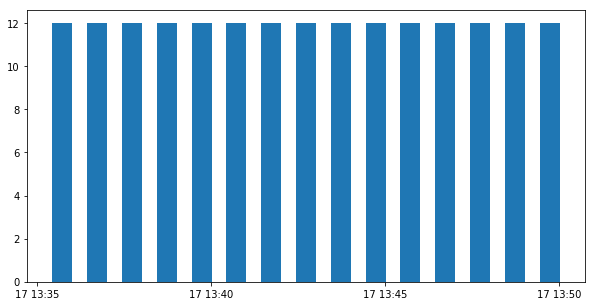

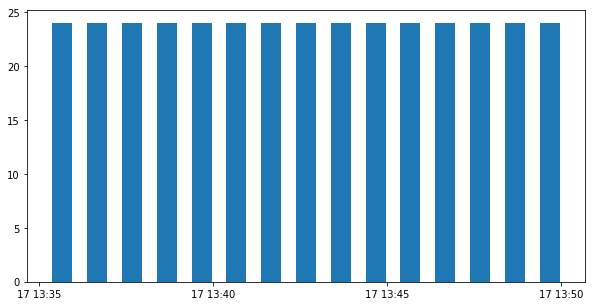

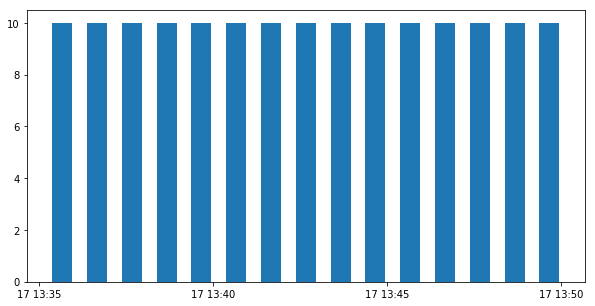

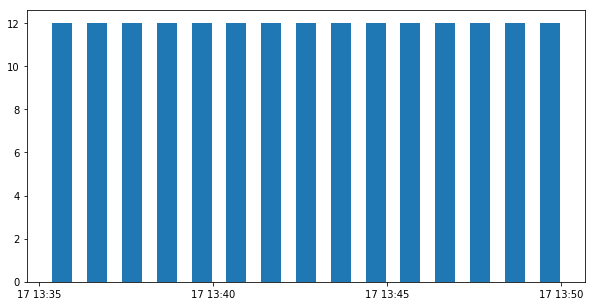

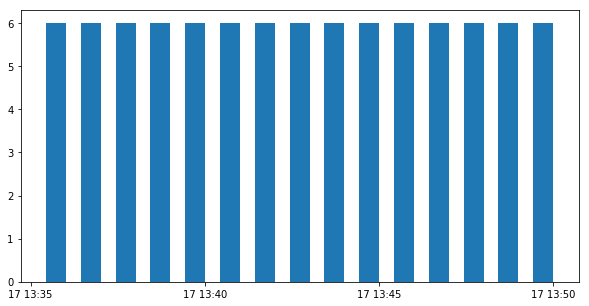

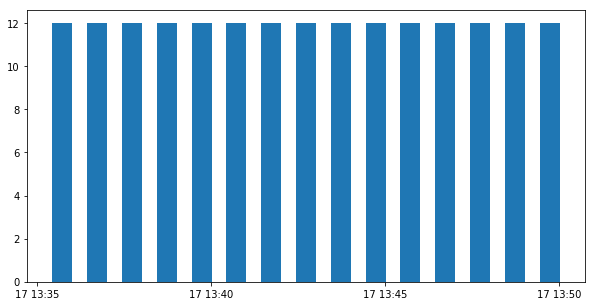

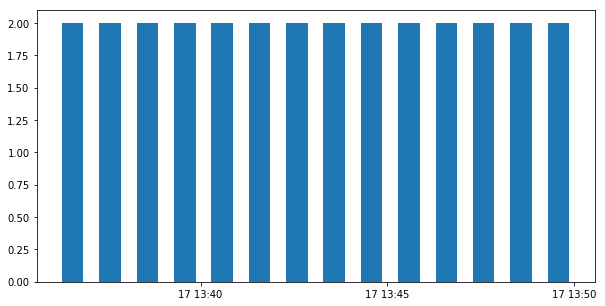

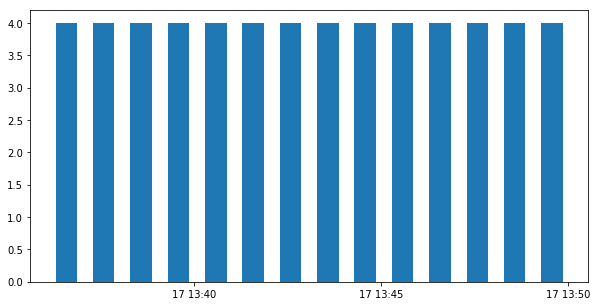

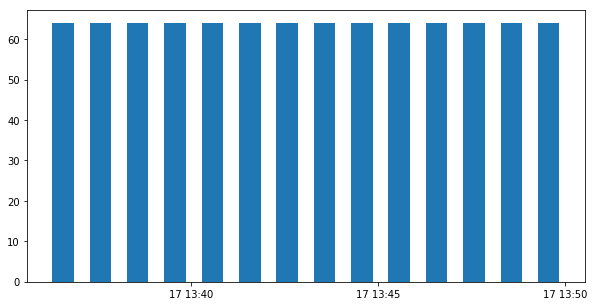

In [70]:
plt.rcParams['figure.figsize'] = [10, 5]
for m in range(10):
    plt.bar(metrics_object_list[m].metric_values.ds, metrics_object_list[m].metric_values.y,width=0.0004,align='center')
    plt.show()

In [71]:
#Obtaining the labels of the metric
for item in metrics_object_list:
    print(item.metric_name, item.label_config)
    print("Number of labels identified:", len(item.label_config), "\n")

cluster:capacity_cpu_cores:sum {'_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '005

cluster:capacity_cpu_cores:sum {'_id': '584b652e-35e3-44a4-8e2c-8715e8912056', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-1', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '590905a9-428e-4bfd-8ae2-fd31d1049128', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-2', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '5909

cluster:capacity_cpu_cores:sum {'_id': '9f8a9efc-5ab6-41e5-b8df-b42f6154cb73', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-6', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': '9fd294e4-8e59-431f-aaf4-11c132a0c07a', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-1', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': '9fd294e4-8e59-4

Number of labels identified: 11 

cluster:capacity_cpu_cores:sum {'_id': 'ead695f8-acf2-492e-b726-c368922341c5', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-0', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 12 

cluster:capacity_cpu_cores:sum {'_id': 'eb2229a9-37c5-481c-9def-b61660ebc592', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm4.large', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-9', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
Number of labels identified: 11 

cluster:ca

The constructor for MetricsList combined all the chunks for each metric time-series in a single Metric object

-----
## More about the `Metric` class
Let's look at one of the metrics from the `metrics_object_list` to learn more about the `Metric` class

In [72]:
metric_object = metrics_object_list[0]
print(type(metric_object))

<class 'prometheus_api_client.metric.Metric'>


In [73]:
print(metric_object)

{
metric_name: 'cluster:capacity_cpu_cores:sum'
label_config: {'_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}
metric_values:                               ds   y
0  2019-07-17 13:35:43.598999977  12
1  2019-07-17 13:36:43.598999977  12
2  2019-07-17 13:37:43.598999977  12
3  2019-07-17 13:38:43.598999977  12
4  2019-07-17 13:39:43.598999977  12
5  2019-07-17 13:40:43.598999977  12
6  2019-07-17 13:41:43.598999977  12
7  2019-07-17 13:42:43.598999977  12
8  2019-07-17 13:43:43.598999977  12
9  2019-07-17 13:44:43.598999977  12
10 2019-07-17 13:45:43.598999977  12
11 2019-07-17 13:46:43.598999977  12
12 2019

The `Metric` object has 3 properties.

They are,

* `metric_name`: stores the name of the metric as a string

* `label_config`: stores metric labels and values as a dict

* `metric_values`: metric values as a pandas dataframe

In [74]:
metric_object.metric_name

'cluster:capacity_cpu_cores:sum'

In [75]:
metric_object.label_config

{'_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e',
 'endpoint': 'internal',
 'job': 'telemeter-server',
 'label_beta_kubernetes_io_instance_type': 'm5.xlarge',
 'label_node_role_kubernetes_io': 'master',
 'monitor': 'prometheus',
 'namespace': 'telemeter-production',
 'pod': 'telemeter-server-4',
 'prometheus': 'openshift-monitoring/k8s',
 'prometheus_replica': 'prometheus-telemeter-0',
 'replica': '$(HOSTNAME)',
 'service': 'telemeter-server'}

In [76]:
metric_object.metric_values

,ds,y
0,2019-07-17 13:35:43.598999977,12
1,2019-07-17 13:36:43.598999977,12
2,2019-07-17 13:37:43.598999977,12
3,2019-07-17 13:38:43.598999977,12
4,2019-07-17 13:39:43.598999977,12
5,2019-07-17 13:40:43.598999977,12
6,2019-07-17 13:41:43.598999977,12
7,2019-07-17 13:42:43.598999977,12
8,2019-07-17 13:43:43.598999977,12
9,2019-07-17 13:44:43.598999977,12


### The `==` operator
What happens when you do `metric_object_1 == metric_object_2`? <br>
The `==` comparison operator checks if `metric_object_1` and `metric_object_2` belong to the same metric time-series.

Let's initialize a `Metric` object for each of the chunks that we downloaded from prometheus in `metric_data`

In [77]:
metric_object_chunk_list = []
for raw_metric in metric_data:
    metric_object_chunk_list.append(Metric(raw_metric))

In [78]:
len(metric_object_chunk_list)

5232

Let's look at the first two metrics from this chunk

In [79]:
print(metric_object_chunk_list[0].metric_name, metric_object_chunk_list[0].label_config)
print("\n-------------------------------------------------------------------------------\n")
print(metric_object_chunk_list[1].metric_name, metric_object_chunk_list[1].label_config)

cluster:capacity_cpu_cores:sum {'_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'label_node_role_kubernetes_io': 'master', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}

-------------------------------------------------------------------------------

cluster:capacity_cpu_cores:sum {'_id': '0004111f-a39a-411c-8c63-fb2dfe0f161e', 'endpoint': 'internal', 'job': 'telemeter-server', 'label_beta_kubernetes_io_instance_type': 'm5.xlarge', 'monitor': 'prometheus', 'namespace': 'telemeter-production', 'pod': 'telemeter-server-4', 'prometheus': 'openshift-monitoring/k8s', 'prometheus_replica': 'prometheus-telemeter-0', 'replica': '$(HOSTNAME)', 'service': 'telemeter-server'}


Here both objects have the same metric name, but the label_configs are different, which means they belong to different metric time-series.

Hence, when we compare them metric_object_chunk_list[0]==metric_object_chunk_list[1] it should return false

In [85]:
print(metric_object_chunk_list[0]==metric_object_chunk_list[1])

False


----
### The `+` operator
What happens when you do `metric_object_1 + metric_object_2`?

Two `Metric` objects that belong to the same metric time-series, when added together, return a new `Metric` object with the combined metric_values that are stored in both objects

Lets try this on `metric_object_chunk_list[0]` and `metric_object_chunk_list[4]` because we know they belong to the same metric time-series

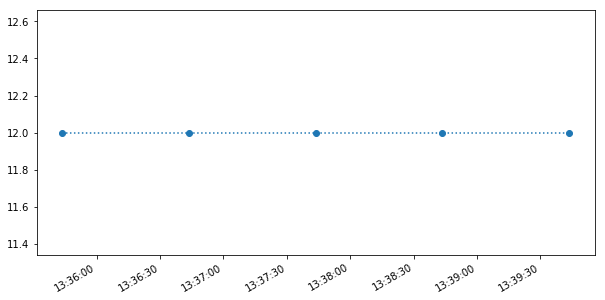

In [81]:
metric_object_chunk_list[0].plot() # plot metric-1

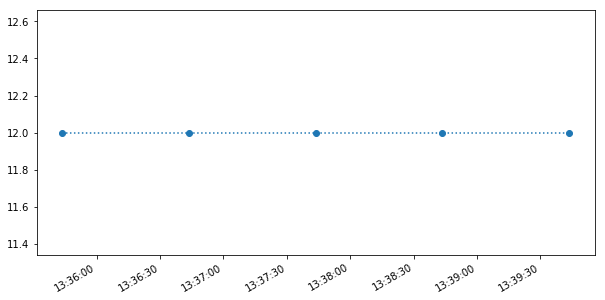

In [82]:
metric_object_chunk_list[1].plot() # plot metric-2

In [83]:
(metric_object_chunk_list[0] + metric_object_chunk_list[1]).plot() # plot metric-1 + metric-2

TypeError: Cannot Add different metric types. Different metric labels

### Plotting
The `Metric` class also has a `plot()`method which lets you plot very simple time-series line graphs

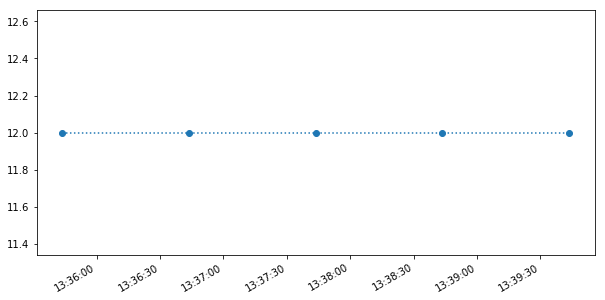

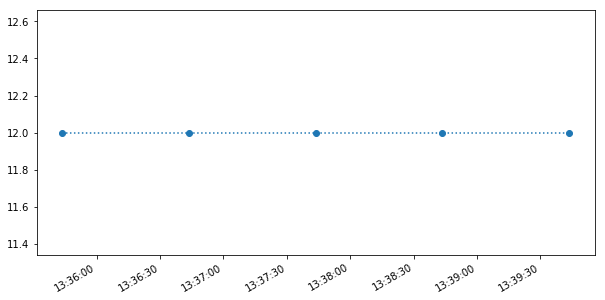

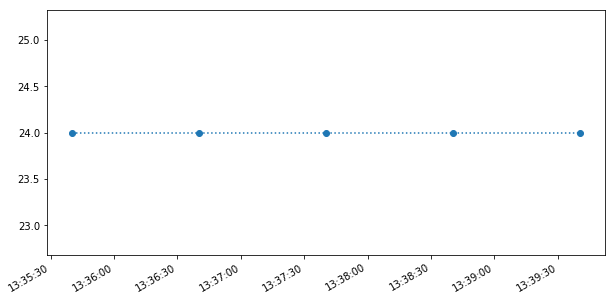

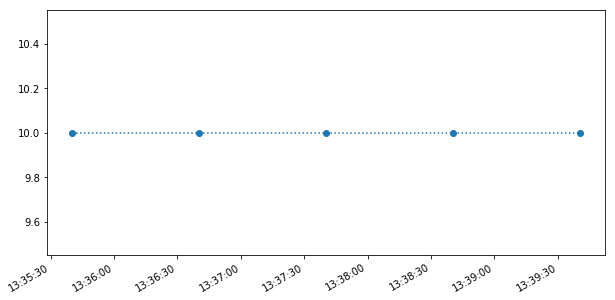

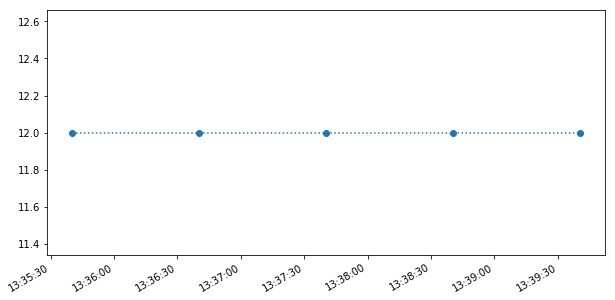

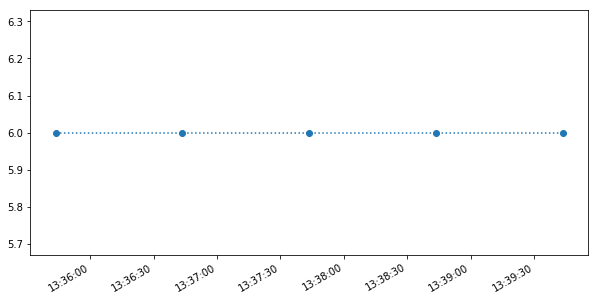

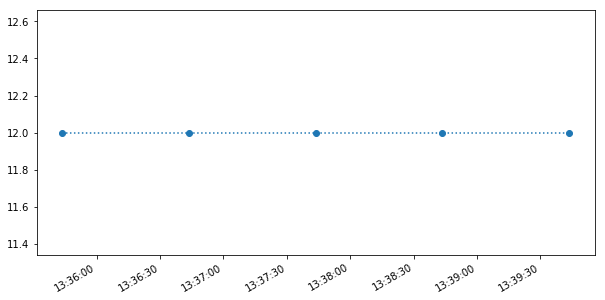

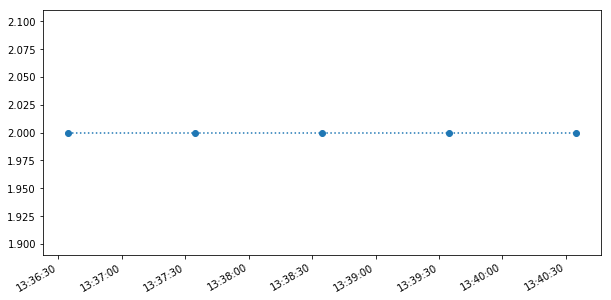

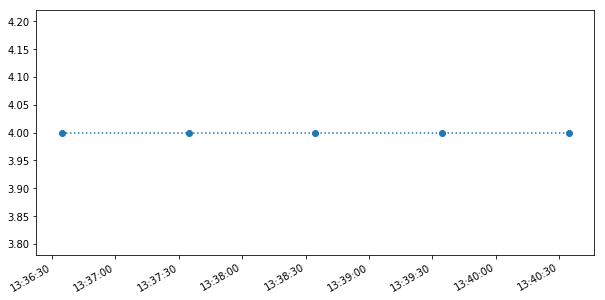

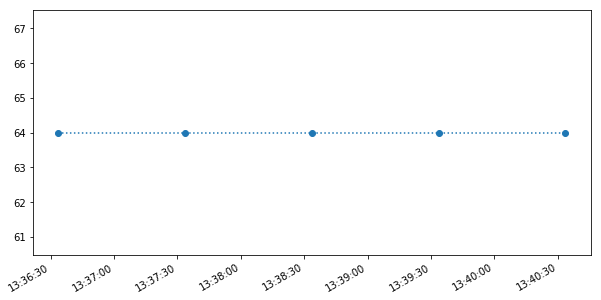

In [84]:
for i in range(10):
    metric_object_chunk_list[i].plot()